# Evaluating Different Machine Learning Techniques

## Import the libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score

## Import the data - Social Network Ads

In [84]:
dataset = pd.read_csv('/MLRaphael/Data.csv')
dataset.head()
print(dataset['Class'].value_counts())

2    444
4    239
Name: Class, dtype: int64


In [85]:
dummy = pd.get_dummies(dataset['Class'])

In [86]:
dummy.head()

,2,4
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [105]:
dataset2 = pd.concat((dataset, dummy), axis=1)
dataset2 = dataset2.drop(['Class'], axis = 1)
dataset2 = dataset2.drop([2], axis=1)
dataset2 = dataset2.rename(columns={4: 'Class'})
dataset2.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [106]:
print(dataset2.shape)
dataset2.describe()

(683, 11)


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Independent variables (features/predictors) and dependent variable (response/outcome)

In [107]:
X = dataset2.iloc[:, :-1].values
y = dataset2.iloc[:, -1].values

## Splitting the Data into Training and Testing Sets

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20,
                                                   random_state = 0)

## Feature Scaling / Normalization / Standardization - Helps Improve Model Performace

In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 1. Logistic Regression

   ### 1.1 Train Logistic Regression Model on the Training Set 

In [110]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(random_state=0)
lg_classifier.fit(X_train, y_train)

C:\Users\M139899\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 1.2 Make Logistic Regression Predictions

In [111]:
lg_y_pred = lg_classifier.predict(X_test)

### 1.3 Logistic Regression Model Performance  - Confusion Matric & Accuracy

In [112]:
from sklearn.metrics import confusion_matrix, accuracy_score, auc

lg_cm = confusion_matrix(y_test, lg_y_pred)
print(lg_cm)
accuracy_score(y_test, lg_y_pred)

[[84  3]
 [ 3 47]]


0.9562043795620438

# 2. K-Nearest Neighbor (kNN)

### 2.1 Train kNN Model on the Training Set

In [113]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 2.2 Make kNN Predictions

In [114]:
knn_y_pred = knn_classifier.predict(X_test)

### 2.3 kNN Model Performance - Confusion Matrix & Accuracy

In [115]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
print(knn_cm)
accuracy_score(y_test, knn_y_pred)

[[83  4]
 [ 2 48]]


0.9562043795620438

# 3. Support Vector Machines (SVM)

### 3.1 Train SVM Model on the Training Set - Using Linear Kernel

In [116]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'linear', random_state = 0)
svc_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

### 3.2 Make SVM Predictions

In [117]:
svc_y_pred = svc_classifier.predict(X_test)

### 3.3 SVM Model Performance - Confusion Matrix & Accuracy

In [118]:
svc_cm = confusion_matrix(y_test, svc_y_pred)
print(svc_cm)
accuracy_score(y_test, svc_y_pred)

[[83  4]
 [ 2 48]]


0.9562043795620438

### Notes: Using the linear kernel we see that the algorithm does not perform better than the knn algorithm because knn is non-linear.

In [119]:
svc_classifier2 = SVC(kernel = 'rbf', random_state = 0)
svc_classifier2.fit(X_train, y_train)

svc_y_pred2 = svc_classifier2.predict(X_test)

svc_cm2 = confusion_matrix(y_test, svc_y_pred2)
print(svc_cm2)
accuracy_score(y_test, svc_y_pred2)

[[82  5]
 [ 1 49]]


0.9562043795620438

# 4. Naive Bayes

### 4.1 Train Naive Bayes Model on the Training Set

In [143]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 4.2 Make Naive Bayes Predictions

In [144]:
nb_y_pred = nb_classifier.predict(X_test)

### 4.3 Naive Bayes Model Performance - Confusion Matrix & Accuracy

In [145]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
print(nb_cm)
accuracy_score(y_test, nb_y_pred)

[[80  7]
 [ 0 50]]


0.948905109489051

# 5. Decision Tree Classification

### 5.1Train Decision Tree Classification Model on the Training Set

In [123]:
from sklearn.tree import DecisionTreeClassifier

dc_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

dc_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

### 5.2 Make Decision Tree Classification Predictions

In [124]:
dc_y_pred = dc_classifier.predict(X_test)

### 5.3 Decision Tree Model Performance - Confusion Matrix & Accuracy

In [125]:
dc_cm = confusion_matrix(y_test, dc_y_pred)
print(dc_cm)
accuracy_score(y_test, dc_y_pred)

[[85  2]
 [ 2 48]]


0.9708029197080292

# 5. Random Forest Classification

### 5.1 Train the Random Forest Classifier on the Training Set

In [126]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### 5.2 Make Random Forest Predictions

In [127]:
rf_y_pred = rf_classifier.predict(X_test)

### 5.3 Random Forest Model Performance - Confusion Matrix & Accuracy

In [128]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)
accuracy_score(y_test, rf_y_pred)

[[84  3]
 [ 1 49]]


0.9708029197080292

# 6. Plot Reciever Operating Characteristic (ROC) Curves for the Models

### 6.1 Compute the Area Under the ROC (AUROC)

In [146]:
r_auc = [0 for _ in range(len(y_test))]
rf_auc = roc_auc_score(y_test, rf_y_pred)
nb_auc = roc_auc_score(y_test, nb_y_pred)
dc_auc = roc_auc_score(y_test, dc_y_pred)

In [147]:
#print('Random (chance) Prediction: AUROC = %.3f' % (float(r_auc)))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('Decision Tree: AUROC = %.3f' % (dc_auc))

Random Forest: AUROC = 0.973
Naive Bayes: AUROC = 0.960
Decision Tree: AUROC = 0.969


### 6.2 Compute the True Positive Rate and False Positive Rate

In [141]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_y_pred)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_y_pred)
dc_fpr, dc_tpr, _ = roc_curve(y_test, dc_y_pred)

### 6.3 Plot the RIC Curve

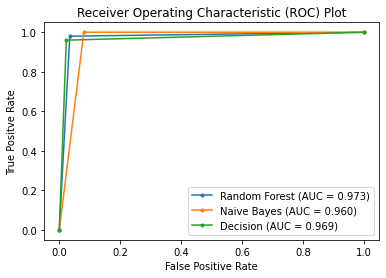

In [142]:
plt.plot(rf_fpr, rf_tpr, marker = '.', label='Random Forest (AUC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker = '.', label='Naive Bayes (AUC = %0.3f)' % nb_auc)
plt.plot(dc_fpr, dc_tpr, marker = '.', label='Decision (AUC = %0.3f)' % dc_auc)

# Title
plt.title('Receiver Operating Characteristic (ROC) Plot')
# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positve Rate')
# Show Legend
plt.legend()
# show Plot
plt.show()